In [35]:
import os
import pandas as pd
from matplotlib import pyplot as plt

We first collect all results from the different libraries. 

In [72]:
pack_colors = { #"snoopy" : "blue",        # Confidence interval with delta method
                "snoopy_B" : "lightblue",  # Confidence interval with bootstrap
                "pyextremes" : "orange",
              }
list_packages = pack_colors.keys()

In [102]:
data = []
for p in list_packages:
    for method in ["bm" , "pot"]:
        for case in ["slamming" , "hs"]:
            res_file = f"{p:}_{case:}_{method:}.csv"
            if os.path.exists(res_file):
                d_ = pd.read_csv( res_file)
                d_["package"] = p
                d_["method"] = method
                d_["case"] = case
                data.append(d_)
data_df = pd.concat(data,axis = 0)

## Comparison of the results from block maxima approach.

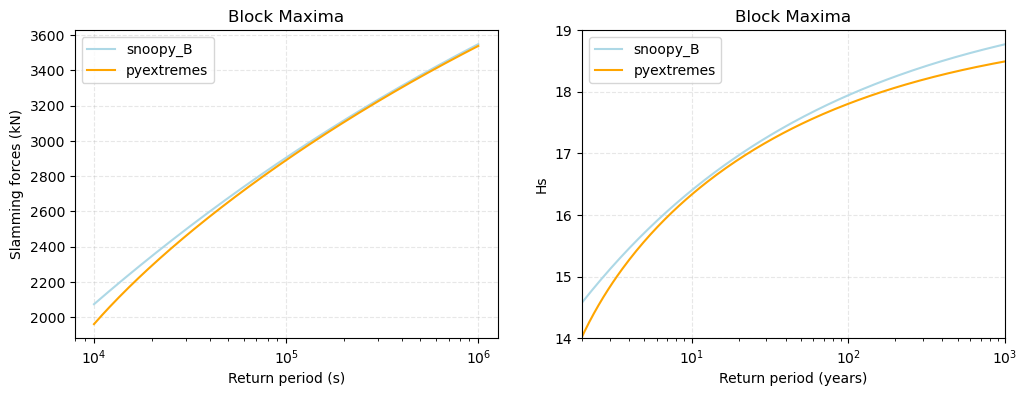

In [107]:
fig, ax = plt.subplots(ncols = 2, figsize= (12,4))
for icase, case in enumerate(["slamming", "hs" ]): 
    for p in list_packages :
        data_df.query( "package==@p and method=='bm' and case==@case" ).set_index("rp").loc[:,"return_value"].plot(ax=ax[icase],label = p,  color = pack_colors[p])
for ax_ in ax:    
    ax_.legend()
    ax_.set_xscale("log")
ax[0].set(title = "Block Maxima", xlabel = "Return period (s)", ylabel = "Slamming forces (kN)");
ax[1].set(title = "Block Maxima", xlabel = "Return period (years)", ylabel = "Hs", xlim = [2 , 1000.] , ylim = [14, 19]);

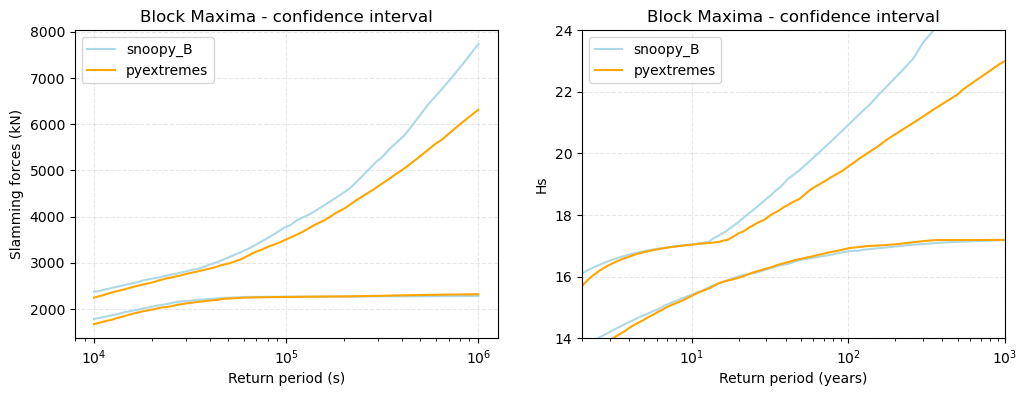

In [98]:
fig, ax = plt.subplots(ncols = 2, figsize= (12,4))
for icase, case in enumerate(["slamming", "hs" ]): 
    for p in list_packages :
        data_df.query( "package==@p and method=='bm' and case==@case" ).set_index("rp").loc[:,"ci_high"].plot(ax=ax[icase],label = p, color = pack_colors[p])
        data_df.query( "package==@p and method=='bm' and case==@case" ).set_index("rp").loc[:,"ci_low"].plot(ax=ax[icase], label = "", color = pack_colors[p])
for ax_ in ax:
    ax_.legend()
    ax_.set_xscale("log")
ax[0].set(title = "Block Maxima - confidence interval", xlabel = "Return period (s)", ylabel = "Slamming forces (kN)");
ax[1].set(title = "Block Maxima - confidence interval", xlabel = "Return period (years)", ylabel = "Hs", xlim = [2 , 1000.] , ylim = [14, 24]);

## Comparison of the results from peak over threshold approach.

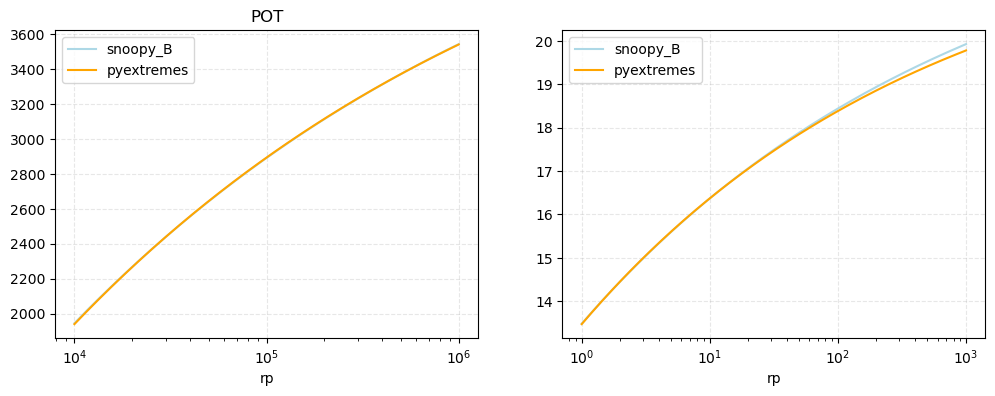

In [106]:
fig, ax = plt.subplots(ncols = 2, figsize= (12,4))
for icase, case in enumerate(["slamming", "hs" ]): 
    for p in list_packages :
        data_df.query( "package==@p and method=='pot' and case==@case" ).set_index("rp").loc[:,"return_value"].plot(ax=ax[icase],label = p,  color = pack_colors[p])
for ax_ in ax:
    ax_.legend()
    ax_.set_xscale("log")
ax[0].set(title = "POT");

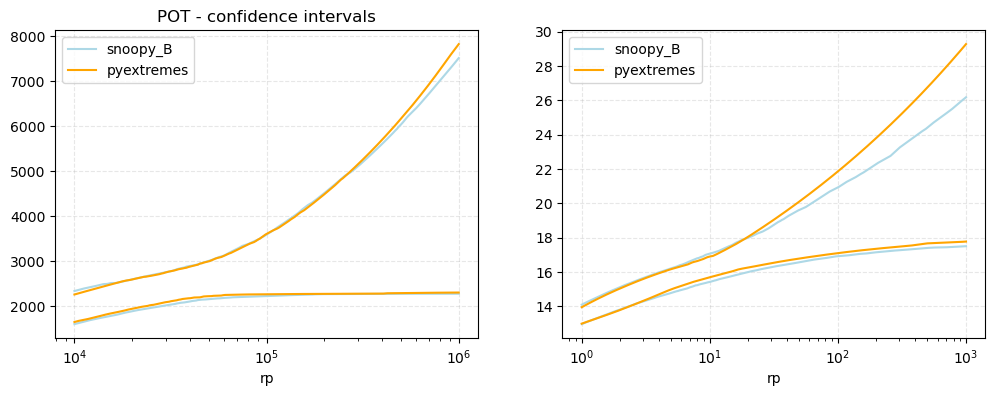

In [105]:
fig, ax = plt.subplots(ncols = 2, figsize= (12,4))
for icase, case in enumerate(["slamming", "hs" ]): 
    for p in list_packages :
        data_df.query( "package==@p and method=='pot' and case==@case" ).set_index("rp").loc[:,"ci_high"].plot(ax=ax[icase],label = p, color = pack_colors[p])
        data_df.query( "package==@p and method=='pot' and case==@case" ).set_index("rp").loc[:,"ci_low"].plot(ax=ax[icase], label = "", color = pack_colors[p])
for ax_ in ax:
    ax_.legend()
    ax_.set_xscale("log")
ax[0].set(title = "POT - confidence intervals");